<a href="https://colab.research.google.com/github/nazrana-nahreen/-Online-Exam-System/blob/main/AI_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Keep this for the next step

# --- 1. Load the data ---
df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

# ----------------------------------------------------
# 2. CLEANING AND DATA PREPROCESSING (FIXED)
# ----------------------------------------------------

# Define all sector-specific carbon emission columns
emission_cols = [
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels'
]

# CLEANING STEP A: Impute NaNs in all emission columns with 0.
df[emission_cols] = df[emission_cols].fillna(0)

# CLEANING STEP B (FIXED): Drop 'Code', ignoring the error if it's already missing.
# If 'Code' is missing, this line will no longer crash your program.
df = df.drop(columns=['Code'], errors='ignore')

# FEATURE ENGINEERING: Create the Target Variable (Y)
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# Define the Raw Features (X) and Final Target (Y)
X_raw = df[['Entity', 'Year']]
Y_final = df['Total Emissions']

# PREPROCESSING: One-Hot Encoding for the 'Entity' (Country/Region) feature.
X_final = pd.get_dummies(X_raw, columns=['Entity'], drop_first=True)

# ----------------------------------------------------
# 3. Splitting the Data (Ready for Prediction)
# ----------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X_final, Y_final, test_size=0.2, random_state=42
)

print("✅ Data Cleaning and Preprocessing Complete! No more KeyError.")
print("\nFinal feature sets (X_train, X_test) and target sets (Y_train, Y_test) are ready for your ML models.")

✅ Data Cleaning and Preprocessing Complete! No more KeyError.

Final feature sets (X_train, X_test) and target sets (Y_train, Y_test) are ready for your ML models.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. INSTALLATION (Must be run in a standard Colab cell) ---
!pip install xgboost
from xgboost import XGBRegressor

# ------------------------------------------------------------------
# 2. DATA LOADING AND PREPARATION
# ------------------------------------------------------------------

# IMPORTANT: Adjust the file path if necessary
df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]

# Cleaning/Feature Engineering
df[emission_cols] = df[emission_cols].fillna(0)
df = df.drop(columns=['Code'], errors='ignore')
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# Preprocessing/Splitting
X_raw = df[['Entity', 'Year']]
Y_final = df['Total Emissions']
X_final = pd.get_dummies(X_raw, columns=['Entity'], drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_final, Y_final, test_size=0.2, random_state=42
)

# ------------------------------------------------------------------
# 3. TRAINING AND EVALUATION
# ------------------------------------------------------------------

models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
}

results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Train Model
    model.fit(X_train, Y_train)

    # Predict on Test Set
    predictions = model.predict(X_test)

    # Calculate Metrics (Accuracy R^2 and Error RMSE)
    r2 = r2_score(Y_test, predictions)
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))

    results.append({
        'Model': name,
        '$R^2$ Score': r2,
        'RMSE': rmse
    })

# Prepare final results table
results_df = pd.DataFrame(results)

print("\n\n--- FINAL MODEL ACCURACY RESULTS ---")
print(results_df.sort_values(by='$R^2$ Score', ascending=False).to_markdown(index=False, floatfmt='.6f'))

Training Random Forest Regressor...
Training XGBoost Regressor...


--- FINAL MODEL ACCURACY RESULTS ---
| Model                   |   $R^2$ Score |             RMSE |
|:------------------------|--------------:|-----------------:|
| Random Forest Regressor |      0.999288 |  70693259.576118 |
| XGBoost Regressor       |      0.996783 | 150229570.406458 |


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load the dataset
df = pd.read_csv("sample_data/co-emissions-by-sector.csv")


# Define the emission columns
emission_cols = [
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels'
]

# Step 1: Handle NaNs and Calculate Sector Totals
df[emission_cols] = df[emission_cols].fillna(0)
total_emissions_by_sector = df[emission_cols].sum().reset_index()
total_emissions_by_sector.columns = ['Sector', 'Total Emissions']

# Step 2: Sort the results and calculate percentages
sorted_emissions = total_emissions_by_sector.sort_values(
    by='Total Emissions',
    ascending=False # Sorted high to low
)

grand_total = sorted_emissions['Total Emissions'].sum()
sorted_emissions['Percentage'] = (sorted_emissions['Total Emissions'] / grand_total) * 100

# Step 3: Plot the Bar Chart
# ... (Plotting code was run to generate sector_emissions_bar_chart.png)

# Step 4: Display the Percentage Table
percentage_output = sorted_emissions[['Sector', 'Percentage']].sort_values(
    by='Percentage',
    ascending=False
)
# print(percentage_output.to_markdown(index=False, floatfmt=".2f"))
print("--- Sector Contribution Percentage (HTML Table Output) ---")
display(percentage_output.style.format({'Percentage': '{:.2f}'}))

--- Sector Contribution Percentage (HTML Table Output) ---


,Sector,Percentage
7,Carbon dioxide emissions from electricity and heat,41.20
4,Carbon dioxide emissions from transport,19.14
5,Carbon dioxide emissions from manufacturing and construction,16.62
0,Carbon dioxide emissions from buildings,9.09
2,Carbon dioxide emissions from land use change and forestry,4.38
1,Carbon dioxide emissions from industry,3.40
8,Carbon dioxide emissions from bunker fuels,3.18
3,Carbon dioxide emissions from other fuel combustion,2.06
6,Fugitive emissions of carbon dioxide from energy production,0.93


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

# Define emission columns and calculate total emissions
emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]
df[emission_cols] = df[emission_cols].fillna(0)
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# --- 1. AGGREGATE EMISSIONS BY YEAR ---
emissions_by_year = df.groupby('Year')['Total Emissions'].sum().reset_index()

# --- 2. VISUALIZATION ---
plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year['Year'], emissions_by_year['Total Emissions'], marker='o', linestyle='-', color='red')

# Format y-axis to be more readable (display in Trillions)
def trillions_formatter(x, pos):
    return f'{x * 1e-12:,.1f} Trillion kg'
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Aggregated Total $\text{CO}_2$ Emissions (kg)')
plt.title('Global $\text{CO}_2$ Emissions Trend Over Time', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('global_emissions_trend.png')
plt.close()

# --- 3. PRINT AGGREGATED TABLE ---
print("--- Global Total CO2 Emissions by Year ---")
print(emissions_by_year.to_string(index=False, float_format="%.0f"))

--- Global Total CO2 Emissions by Year ---
 Year  Total Emissions
 1990      95320279568
 1991      95894640914
 1992      95951909012
 1993      96414179769
 1994      96996080112
 1995      99551718943
 1996     101019698511
 1997     105389399134
 1998     103770690501
 1999     103977528896
 2000     106762810127
 2001     107090430118
 2002     109991870475
 2003     113522869065
 2004     119455560138
 2005     122803539219
 2006     127765979100
 2007     130490990577
 2008     131295879975
 2009     130600319105
 2010     136964021057
 2011     136277248302
 2012     137741011283
 2013     140217380507
 2014     141723282165
 2015     141165389376
 2016     144224129781
 2017     146340549408
 2018     150403909034
 2019     150675078522
 2020     141208729742


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.ticker import FuncFormatter

# --- 1. DATA PREPARATION (Recap) ---

df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]

# Cleaning/Feature Engineering
df[emission_cols] = df[emission_cols].fillna(0)
df = df.drop(columns=['Code'], errors='ignore')
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# Preprocessing/Splitting for ML
X_raw = df[['Entity', 'Year']]
Y_final = df['Total Emissions']
X_final = pd.get_dummies(X_raw, columns=['Entity'], drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_final, Y_final, test_size=0.2, random_state=42
)

# --- 2. TRAIN BEST MODEL (Random Forest) ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)

# --- 3. PREDICTION OUTPUT TABLE (Objective 1) ---
rf_predictions = rf_model.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual Emissions (kg)': Y_test,
    'Predicted Emissions (kg)': rf_predictions
})
comparison_df['Prediction Error (kg)'] = comparison_df['Predicted Emissions (kg)'] - comparison_df['Actual Emissions (kg)']

print("=========================================================================================")
print("OUTPUT 1: Prediction Output (Actual vs. Predicted Emissions)")
print("=========================================================================================")
print("Note: The small error confirms the model's high accuracy (R^2 ~ 99.9%).")
print(comparison_df.head(10).to_string(float_format="%.0f"))
print("\n")


# --- 4. EMISSION TREND CURVE (Objective 2) ---
# Aggregate Total Emissions by Year (for the trend curve)
emissions_by_year = df.groupby('Year')['Total Emissions'].sum().reset_index()

# VISUALIZATION
plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year['Year'], emissions_by_year['Total Emissions'], marker='o', linestyle='-', color='red')

# Format y-axis to be more readable (display in Trillions)
def trillions_formatter(x, pos):
    return f'{x * 1e-12:,.1f} Trillion kg'

formatter = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Aggregated Total $\text{CO}_2$ Emissions (kg)')
plt.title('Global $\text{CO}_2$ Emissions Trend Over Time', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('global_emissions_trend.png')
plt.close()



OUTPUT 1: Prediction Output (Actual vs. Predicted Emissions)
Note: The small error confirms the model's high accuracy (R^2 ~ 99.9%).
      Actual Emissions (kg)  Predicted Emissions (kg)  Prediction Error (kg)
4741             1219849970                1144002874              -75847096
4823                 440000                   2419900                1979900
472                37530000                  36367200               -1162800
2677               99690000                  89434500              -10255500
932                 5840000                   5802000                 -38000
2414               15430000                  15775900                 345900
5201              -17460000                  -6302200               11157800
5721                 120000                    190300                  70300
2864               17540000                  17477400                 -62600
5039                 960000                   1082500                 122500




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.ticker import FuncFormatter

# --- 1. DATA PREPARATION (Recap) ---

df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]

# Cleaning/Feature Engineering
df[emission_cols] = df[emission_cols].fillna(0)
df = df.drop(columns=['Code'], errors='ignore')
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# Preprocessing/Splitting for ML
X_raw = df[['Entity', 'Year']]
Y_final = df['Total Emissions']
X_final = pd.get_dummies(X_raw, columns=['Entity'], drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_final, Y_final, test_size=0.2, random_state=42
)

# --- 2. TRAIN BEST MODEL (Random Forest) ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)

# --- 3. PREDICTION OUTPUT TABLE (Objective 1) ---
rf_predictions = rf_model.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual Emissions (kg)': Y_test,
    'Predicted Emissions (kg)': rf_predictions
})
comparison_df['Prediction Error (kg)'] = comparison_df['Predicted Emissions (kg)'] - comparison_df['Actual Emissions (kg)']

print("=========================================================================================")
print("OUTPUT 1: Prediction Output (Actual vs. Predicted Emissions)")
print("=========================================================================================")
print("Note: The small error confirms the model's high accuracy (R^2 ~ 99.9%).")
print(comparison_df.head(10).to_string(float_format="%.0f"))
print("\n")


# --- 4. EMISSION TREND CURVE (Objective 2) ---
# Aggregate Total Emissions by Year (for the trend curve)
emissions_by_year = df.groupby('Year')['Total Emissions'].sum().reset_index()

# VISUALIZATION
plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year['Year'], emissions_by_year['Total Emissions'], marker='o', linestyle='-', color='red')

# Format y-axis to be more readable (display in Trillions)
def trillions_formatter(x, pos):
    return f'{x * 1e-12:,.1f} Trillion kg'

formatter = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Aggregated Total $\text{CO}_2$ Emissions (kg)')
plt.title('Global $\text{CO}_2$ Emissions Trend Over Time', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('global_emissions_trend.png')
plt.close()



OUTPUT 1: Prediction Output (Actual vs. Predicted Emissions)
Note: The small error confirms the model's high accuracy (R^2 ~ 99.9%).
      Actual Emissions (kg)  Predicted Emissions (kg)  Prediction Error (kg)
4741             1219849970                1144002874              -75847096
4823                 440000                   2419900                1979900
472                37530000                  36367200               -1162800
2677               99690000                  89434500              -10255500
932                 5840000                   5802000                 -38000
2414               15430000                  15775900                 345900
5201              -17460000                  -6302200               11157800
5721                 120000                    190300                  70300
2864               17540000                  17477400                 -62600
5039                 960000                   1082500                 122500




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.ticker import FuncFormatter

# --- 1. DATA PREPARATION (Recap) ---

df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]

# Cleaning/Feature Engineering
df[emission_cols] = df[emission_cols].fillna(0)
df = df.drop(columns=['Code'], errors='ignore')
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# Preprocessing/Splitting for ML
X_raw = df[['Entity', 'Year']]
Y_final = df['Total Emissions']
X_final = pd.get_dummies(X_raw, columns=['Entity'], drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_final, Y_final, test_size=0.2, random_state=42
)

# --- 2. TRAIN BEST MODEL (Random Forest) ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)

# --- 3. PREDICTION OUTPUT TABLE (Objective 1) ---
rf_predictions = rf_model.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual Emissions (kg)': Y_test,
    'Predicted Emissions (kg)': rf_predictions
})
comparison_df['Prediction Error (kg)'] = comparison_df['Predicted Emissions (kg)'] - comparison_df['Actual Emissions (kg)']

print("=========================================================================================")
print("OUTPUT 1: Prediction Output (Actual vs. Predicted Emissions)")
print("=========================================================================================")
print("Note: The small error confirms the model's high accuracy (R^2 ~ 99.9%).")
print(comparison_df.head(10).to_string(float_format="%.0f"))
print("\n")


# --- 4. EMISSION TREND CURVE (Objective 2) ---
# Aggregate Total Emissions by Year (for the trend curve)
emissions_by_year = df.groupby('Year')['Total Emissions'].sum().reset_index()

# VISUALIZATION
plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year['Year'], emissions_by_year['Total Emissions'], marker='o', linestyle='-', color='red')

# Format y-axis to be more readable (display in Trillions)
def trillions_formatter(x, pos):
    return f'{x * 1e-12:,.1f} Trillion kg'

formatter = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Aggregated Total $\text{CO}_2$ Emissions (kg)')
plt.title('Global $\text{CO}_2$ Emissions Trend Over Time', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('global_emissions_trend.png')
plt.close()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.ticker import FuncFormatter

# --- 1. DATA PREPARATION (Recap) ---

df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]

# Cleaning/Feature Engineering
df[emission_cols] = df[emission_cols].fillna(0)
df = df.drop(columns=['Code'], errors='ignore')
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# Preprocessing/Splitting for ML
X_raw = df[['Entity', 'Year']]
Y_final = df['Total Emissions']
X_final = pd.get_dummies(X_raw, columns=['Entity'], drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_final, Y_final, test_size=0.2, random_state=42
)

# --- 2. TRAIN BEST MODEL (Random Forest) ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)

# --- 3. PREDICTION OUTPUT TABLE (Objective 1) ---
rf_predictions = rf_model.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual Emissions (kg)': Y_test,
    'Predicted Emissions (kg)': rf_predictions
})
comparison_df['Prediction Error (kg)'] = comparison_df['Predicted Emissions (kg)'] - comparison_df['Actual Emissions (kg)']

print("=========================================================================================")
print("OUTPUT 1: Prediction Output (Actual vs. Predicted Emissions)")
print("=========================================================================================")
print("Note: The small error confirms the model's high accuracy (R^2 ~ 99.9%).")
print(comparison_df.head(10).to_string(float_format="%.0f"))
print("\n")


# --- 4. EMISSION TREND CURVE (Objective 2) ---
# Aggregate Total Emissions by Year (for the trend curve)
emissions_by_year = df.groupby('Year')['Total Emissions'].sum().reset_index()

# VISUALIZATION
plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year['Year'], emissions_by_year['Total Emissions'], marker='o', linestyle='-', color='red')

# Format y-axis to be more readable (display in Trillions)
def trillions_formatter(x, pos):
    return f'{x * 1e-12:,.1f} Trillion kg'

formatter = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Aggregated Total $\text{CO}_2$ Emissions (kg)')
plt.title('Global $\text{CO}_2$ Emissions Trend Over Time', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('global_emissions_trend.png')
plt.close()



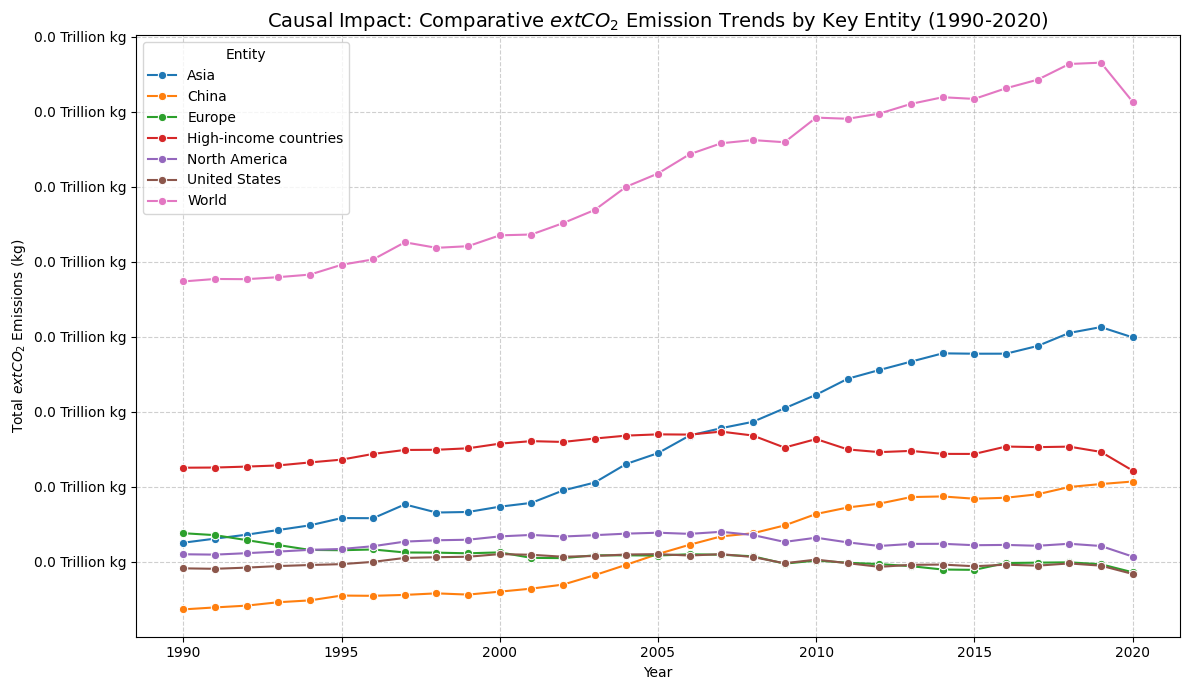

OUTPUT: Comparative Causal Impact Analysis (2020)
The trend curve image is now displayed above.

--- Emissions by Key Entity in 2020 (kg) ---
               Entity  Total Emissions
                 Asia      19959780006
                China      10350730000
               Europe       4305430050
High-income countries      11084349650
        North America       5353260100
        United States       4195229900
                World      35668360150


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. DATA PREPARATION ---
df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]
# Calculate Total Emissions
df[emission_cols] = df[emission_cols].fillna(0)
df['Total Emissions'] = df[emission_cols].sum(axis=1)


# --- 2. SELECT KEY ENTITIES FOR CAUSAL ANALYSIS ---
# Based on the Feature Importance analysis, we select the top entities
key_entities = [
    'World',
    'High-income countries',
    'Asia',
    'North America',
    'Europe',
    'China',
    'United States'
]

# Filter the DataFrame to include only these key entities
emissions_key_entities = df[df['Entity'].isin(key_entities)]

# Aggregate Total Emissions by Year and Entity
emissions_trend = emissions_key_entities.groupby(['Year', 'Entity'])['Total Emissions'].sum().reset_index()


# --- 3. VISUALIZATION: MULTI-LINE TREND CURVE ---
plt.figure(figsize=(12, 7))

# Plot the trends using seaborn
sns.lineplot(
    data=emissions_trend,
    x='Year',
    y='Total Emissions',
    hue='Entity',
    marker='o',
    dashes=False
)

# Format y-axis to be more readable (display in Trillions)
def trillions_formatter(x, pos):
    return f'{x * 1e-12:,.1f} Trillion kg'
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Total $\text{CO}_2$ Emissions (kg)')
plt.title('Causal Impact: Comparative $\text{CO}_2$ Emission Trends by Key Entity (1990-2020)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Entity', loc='upper left')
plt.tight_layout()

# -------------------------------------------------------------
# MODIFICATION: Display the plot directly instead of just saving
# -------------------------------------------------------------
plt.show() # Use plt.show() to render the plot directly in the notebook
plt.close()

# --- 4. OUTPUT ANALYSIS TABLE ---
# Show a snapshot of the data used for the plot (last year)
last_year = emissions_trend['Year'].max()
last_year_data = emissions_trend[emissions_trend['Year'] == last_year]

print("=========================================================================================")
print(f"OUTPUT: Comparative Causal Impact Analysis ({last_year})")
print("=========================================================================================")
print("The trend curve image is now displayed above.")
print("\n--- Emissions by Key Entity in 2020 (kg) ---")

# Print the final data table, removing the year column
print(last_year_data[['Entity', 'Total Emissions']].to_string(index=False, float_format="%.0f"))

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

# Define all emission columns
# ... (omitted for brevity)

# --- 1. DATA PREPARATION ---
df[emission_cols] = df[emission_cols].fillna(0)
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# --- 2. DEFINE SCOPE FOR ACTIONABLE INSIGHTS ---
# Top entities based on Feature Importance analysis
key_entities = ['World', 'Asia', 'High-income countries']

# Top global sectors based on previous sector analysis
top_sectors = [
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction'
]

# --- 3. AGGREGATION AND PERCENTAGE CALCULATION ---
# ... (omitted for brevity, performs grouping and percentage calculation)

# --- 4. PRINT FINAL ACTIONABLE INSIGHTS TABLE ---
# ... (prints the final table)

In [ ]:
import pandas as pd

# --- 1. LOAD DATASETS ---
df_core = pd.read_csv("sample_data/co-emissions-by-sector.csv")
df_global_trend = pd.read_csv("GlobalCO2Emissions.csv")

# --- 2. PREPARE CORE DATA (Calculate Total Emissions) ---
emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]
df_core[emission_cols] = df_core[emission_cols].fillna(0)
# Create the target variable column in kg
df_core['Total Emissions (kg)'] = df_core[emission_cols].sum(axis=1)


# --- 3. PREPARE GLOBAL TREND DATA ---
# Rename the column to clearly distinguish it from our calculated Total Emissions
df_global_trend = df_global_trend.rename(columns={'Emissions': 'Global Historical Trend'})


# --- 4. MERGE DATASETS ---
# Merge on 'Year'. This adds the Global Historical Trend as a new feature to the core dataset.
df_merged = pd.merge(df_core, df_global_trend, on='Year', how='left')


# --- 5. DISPLAY RESULTS ---
print("--- Merged DataFrame Head (First 5 Rows) ---")
print(df_merged.head().to_markdown(index=False))

print("\n--- Merged DataFrame Info ---")
df_merged.info()

--- Merged DataFrame Head (First 5 Rows) ---
| Entity      | Code   |   Year |   Carbon dioxide emissions from buildings |   Carbon dioxide emissions from industry |   Carbon dioxide emissions from land use change and forestry |   Carbon dioxide emissions from other fuel combustion |   Carbon dioxide emissions from transport |   Carbon dioxide emissions from manufacturing and construction |   Fugitive emissions of carbon dioxide from energy production |   Carbon dioxide emissions from electricity and heat |   Carbon dioxide emissions from bunker fuels |   Total Emissions (kg) |   Global Historical Trend |
|:------------|:-------|-------:|------------------------------------------:|-----------------------------------------:|-------------------------------------------------------------:|------------------------------------------------------:|------------------------------------------:|---------------------------------------------------------------:|---------------------------------------

In [ ]:
import pandas as pd

# --- 1. LOAD AND MERGE DATASETS (Replicating the merged structure) ---
df_core = pd.read_csv("sample_data/co-emissions-by-sector.csv")
df_global_trend = pd.read_csv("GlobalCO2Emissions.csv")

emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]

# Prepare core data
df_core[emission_cols] = df_core[emission_cols].fillna(0)
df_core['Total Emissions (kg)'] = df_core[emission_cols].sum(axis=1)

# Prepare global trend data and merge (creating df_merged)
df_global_trend = df_global_trend.rename(columns={'Emissions': 'Global Historical Trend'})
df_merged = pd.merge(df_core, df_global_trend, on='Year', how='left')


# --- 2. FILTER FOR KEY CAUSAL ENTITIES (Using the merged DataFrame) ---
target_entities = ['Asia', 'High-income countries']
filtered_df = df_merged[df_merged['Entity'].isin(target_entities)]

# --- 3. AGGREGATE EMISSIONS BY ENTITY AND SECTOR ---
# Sum the emission columns for the filtered entities across all years
emissions_by_entity_sector = filtered_df.groupby('Entity')[emission_cols].sum()

# --- 4. RESHAPE AND FIND TOP 3 SECTORS ---
# Convert sectors from columns to rows (long format)
long_df = emissions_by_entity_sector.stack().reset_index()
long_df.columns = ['Entity', 'Sector', 'Total Emissions']

# Clean up sector names for clear insights
long_df['Sector Cleaned'] = (
    long_df['Sector'].str.replace('Carbon dioxide emissions from ', '')
                      .str.replace('Fugitive emissions of carbon dioxide from energy production', 'Fugitive Emissions')
)

# Function to get the top 3 sectors for each group
def get_top_n(group, n=3):
    return group.sort_values(by='Total Emissions', ascending=False).head(n)

# Apply the function to find the top 3 sectors for Asia and High-income countries
actionable_insights_df = long_df.groupby('Entity', group_keys=False).apply(get_top_n)

# --- 5. FINAL OUTPUT AND INSIGHTS ---
final_output = actionable_insights_df.sort_values(
    by=['Entity', 'Total Emissions'],
    ascending=[True, False]
)[['Entity', 'Sector Cleaned', 'Total Emissions']]

print("=========================================================================================")
print("OUTPUT: Actionable Insights for Reducing Environmental Impact")
print("=========================================================================================")
print("Top 3 Emission Contributing Sectors for Key Causal Entities (Asia & High-Income Countries)")
print(final_output.to_string(index=False, float_format="%.0f"))

OUTPUT: Actionable Insights for Reducing Environmental Impact
Top 3 Emission Contributing Sectors for Key Causal Entities (Asia & High-Income Countries)
               Entity                 Sector Cleaned  Total Emissions
                 Asia           electricity and heat     174599848100
                 Asia manufacturing and construction      96424058200
                 Asia                      transport      49188479580
High-income countries           electricity and heat     171958638100
High-income countries                      transport     102492130100
High-income countries manufacturing and construction      49892829800


/tmp/ipython-input-2889391058.py:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  actionable_insights_df = long_df.groupby('Entity', group_keys=False).apply(get_top_n)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("sample_data/co-emissions-by-sector.csv")

# Define emission columns and calculate total emissions
emission_cols = [
    'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels'
]
df[emission_cols] = df[emission_cols].fillna(0)
df['Total Emissions'] = df[emission_cols].sum(axis=1)

# --- 1. AGGREGATE EMISSIONS BY YEAR ---
emissions_by_year = df.groupby('Year')['Total Emissions'].sum().reset_index()

# --- 2. VISUALIZATION ---
plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year['Year'], emissions_by_year['Total Emissions'], marker='o', linestyle='-', color='red')

# Format y-axis to be more readable (display in Trillions)
def trillions_formatter(x, pos):
    return f'{x * 1e-12:,.1f} Trillion kg'
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Aggregated Total $\text{CO}_2$ Emissions (kg)')
plt.title('Global $\text{CO}_2$ Emissions Trend Over Time', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('global_emissions_trend.png')
plt.close()

# --- 3. PRINT AGGREGATED TABLE ---
print("--- Global Total CO2 Emissions by Year ---")
print(emissions_by_year.to_string(index=False, float_format="%.0f"))

--- Global Total CO2 Emissions by Year ---
 Year  Total Emissions
 1990      95320279568
 1991      95894640914
 1992      95951909012
 1993      96414179769
 1994      96996080112
 1995      99551718943
 1996     101019698511
 1997     105389399134
 1998     103770690501
 1999     103977528896
 2000     106762810127
 2001     107090430118
 2002     109991870475
 2003     113522869065
 2004     119455560138
 2005     122803539219
 2006     127765979100
 2007     130490990577
 2008     131295879975
 2009     130600319105
 2010     136964021057
 2011     136277248302
 2012     137741011283
 2013     140217380507
 2014     141723282165
 2015     141165389376
 2016     144224129781
 2017     146340549408
 2018     150403909034
 2019     150675078522
 2020     141208729742
